In [2]:
%matplotlib inline

In [150]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure
import os
import skimage
from sklearn import svm
import numpy as np
from skimage.filters import sobel
from sklearn.linear_model import Ridge,RidgeClassifier
from skimage.feature import canny
from scipy import ndimage as ndi
import skimage
from skimage.color import label2rgb
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
import cv2
from skimage.filters import roberts, sobel, scharr, prewitt
import random
import shutil

random.seed(1)
np.random.seed(11)
kernel=np.zeros((13,13),dtype=np.uint8)
kernel[:,kernel.shape[1]//2]=1
kernel[kernel.shape[0]//2,:]=1
def remove_back(image):
    image_c=skimage.filters.gaussian(image, \
       sigma=0.6, output=None, mode='nearest')
    image_c=image
    #     image_c=cv2.GaussianBlur(image_c,(15,15),0)
    filtered=canny(image,sigma=0.252)# 0.052
#     print(filtered[:5,:5])
    filtered=filtered!=0
    edges =skimage.img_as_ubyte(filtered)
    edges=cv2.GaussianBlur(edges,(15,15),0)#,sigmaX=0.4,sigmaY=0.4)
#     edges=cv2.dilate(edges,kernel,iterations = 1)
    edges=cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel,iterations=3)
    #     edges=edges!=0.0

    #     image_min[result2==255]=0
    edges[edges==51]=0
    edges_c=edges.copy()
    mask = np.zeros((image_c.shape[0]+2,
               image_c.shape[1]+2), np.uint8)
    
    # Floodfill from point (0, 0)
    cv2.floodFill(edges, mask, (398,0), 51)
    cv2.floodFill(edges, mask, (385,10), 51)

    cv2.floodFill(edges, mask, (10,10), 51)
    cv2.floodFill(edges, mask, (5,5), 51)
    
    image_c[edges==51]=0
    
#     image_c=cv2.GaussianBlur(image_c,(3,3),0)
    return image_c,edges_c

if os.path.exists('rem_back_hidden'):
    shutil.rmtree('rem_back_hidden/')
if not os.path.exists('rem_back_hidden'):
    os.mkdir('rem_back_hidden')

X=None
y=np.empty((0,1),dtype=str)

classP=[os.path.join('imgs_hidden',i)\
         for i in os.listdir('imgs_hidden') if not i.startswith('.') ]

print(data.coins().shape)
plt.figure(figsize=(10,10))

for indc,classi in enumerate(classP):
    imgs=[os.path.join(classi,i) for i in os.listdir(classi) ]
    img_subset=np.random.choice(imgs,(1,))
    for indi,img in enumerate(imgs):
        cimg=skimage.io.imread(img)
        
#         cimg=skimage.filters.gaussian(cimg, \
#                         sigma=0.9,multichannel=True, output=None, mode='nearest')
        image = color.rgb2gray(cimg)
        rimg,edge=remove_back(image)
        fd, grey = hog(edge, orientations=8, pixels_per_cell=(16, 16),\
                            cells_per_block=(1, 1), visualise=True)
        
        grey=exposure.rescale_intensity(grey, in_range=(0, 0.05))
        skimage.io.imsave('rem_back_hidden'+img[img.rindex('/'):],rimg)
#         plt.figure(figsize=(10,10))
#         plt.clf()
#         plt.imshow(rimg,cmap=plt.cm.gray)
#         plt.savefig('rem_back_hidden'+img[img.rindex('/'):]\
#             ,dpi=160)
#         cv2.imwrite('rem_back/img_{}.png'\
#             .format(random.randrange(500)),edge)

(303, 384)


/home/kiks/miniconda3/lib/python3.4/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure
import os
import skimage
from sklearn import svm
import numpy as np
from skimage.filters import sobel
from sklearn.linear_model import Ridge,RidgeClassifier
from skimage.feature import canny
from scipy import ndimage as ndi
import skimage
from skimage.color import label2rgb
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
import cv2

# def fill_image(image):
#     for ir,row in enumerate(image):
#         for ic,col in enumerate(row):
#             leftnp.sum()

X=None
y=np.empty((0,1),dtype=str)

classP=[os.path.join('imgs_hidden',i)\
        for i in os.listdir('imgs_hidden') if not i.startswith('.') ]

print(data.coins().shape)

for indc,classi in enumerate(classP):
    imgs=[os.path.join(classi,i) for i in os.listdir(classi) ]
    img_subset=np.random.choice(imgs,(3,))
    for indi,img in enumerate(img_subset):
        cimg=skimage.io.imread(img)
        image = color.rgb2gray(cimg)

#         print(image.shape)
#         fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
#                             cells_per_block=(1, 1), visualise=True)
        elevation_map = sobel(image)
        if indi%6==0 and indc%8==2:
            print("im in: ",indc,indi,elevation_map.dtype ,flush=True)
#             plt.imshow(elevation_map)
            
    
            edges = canny(image)
            edges=skimage.filters.gaussian(edges, \
            sigma=0.8, output=None, mode='nearest')
            
            image_two=image.copy()
            image_two[edges==0.0]=0
            
            cc=ndi.binary_erosion(edges)
            
            fill_coins = ndi.binary_fill_holes(edges)
            label_objects, nb_labels = ndi.label(fill_coins)
            
            

            elevation_map = sobel(image)
            distance = ndi.distance_transform_edt(image)

            local_maxi = peak_local_max(image,min_distance=20)
            
            print(nb_labels,local_maxi,np.sum(local_maxi==0.0))
            img_mx=np.zeros_like(image)
            img_mx[local_maxi[:,0],local_maxi[:,1]]=1
            
            wimg=skimage.morphology.watershed(elevation_map,img_mx)
            
            fgbg = cv2.createBackgroundSubtractorMOG2()
            
            fgmask = fgbg.apply(cimg)
            
            edges=edges!=0
            plt.figure(figsize=(20,20))
            plt.imshow(edges,cmap=plt.cm.gray)
            
            print(np.percentile(edges,(40,60,90)))
            
#             plt.figure(figsize=(20,20))
#             plt.hist(edges.flatten(),200)
            
            plt.axis('off')
            plt.title('Canny detector')
            
#             plt.figure(figsize=(20,20))
#             plt.imshow(fgmask,)
            plt.axis('off')
            plt.title('Canny detector')
            sign=findSignificantContours(image,
                skimage.img_as_ubyte(edges))
            mask=np.zeros_like(image)
            cv2.fillPoly(mask, sign, 255)
            for i in range(10): cv2.fillPoly(mask, sign, 255)
#             mask=np.logical_not(mask)
            print(mask.dtype,mask[mask!=0][:5])
#             image[mask]=0
            plt.figure(figsize=(20,20))
            plt.imshow(mask,cmap=plt.cm.gray)
#             np.savetxt('file.csv',edges,fmt='%.5f',delimiter=',')
            
            
#             image_label_overlay = label2rgb(labeled_coins, image=coins)

#             plt.figure(figsize=(20,20))
#             plt.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
#             ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
#             print(labeled_coins.shape)




In [ ]:
from skimage import morphology


coins = data.coins()
edges = canny(coins/255.)
fill_coins = ndi.binary_fill_holes(edges)
coins_cleaned = morphology.remove_small_objects(fill_coins, 21)
plt.figure(figsize=(20,20))
plt.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')


In [ ]:
def findSignificantContours (img, scharr_8u):
    image, contours, heirarchy = cv2.findContours(scharr_8u, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#     plt.imshow(image,cmap=plt.cm.gray)
    # Find level 1 contours
    level1 = []
    for i, tupl in enumerate(heirarchy[0]):
        # Each array is in format (Next, Prev, First child, Parent)
        # Filter the ones without parent
        if tupl[3] == -1:
            tupl = np.insert(tupl, 0, [i])
            level1.append(tupl)
    # From among them, find the contours with large surface area.
    significant = []
    tooSmall = scharr_8u.size * 5 / 100 # If contour isn't covering 5% of total area of image then it probably is too small
    for tupl in level1:
        contour = contours[tupl[0]];
        area = cv2.contourArea(contour)
        if area > tooSmall:
            significant.append([contour, area])

            # Draw the contour on the original image
            cv2.drawContours(img, [contour], 0, (0,255,0),2, cv2.LINE_AA, maxLevel=1)
    plt.figure(figsize=(20,20))
#     cv2.fillPoly(img,[x[0] for x in significant][0].reshape(-1,2),255)
    plt.imshow(img,cmap=plt.cm.gray)
    significant.sort(key=lambda x: x[1])
    #print ([x[1] for x in significant]);
    return [x[0] for x in significant]

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import skimage
import skimage.io
from skimage.filters import roberts, sobel, scharr,\
prewitt,threshold_otsu,threshold_yen, threshold_li\


image=skimage.io.imread('img_185.png')
image=skimage.color.rgb2gray(image)

scharr=skimage.filters.scharr(image)
sob=sobel(image)
print(sob[:5,:5])
# sob = skimage.img_as_uint(sob)
# sob[sob<=np.percentile(sob.flatten(),70)]=0

# sob=skimage.img_as_ubyte(sob)
sob[sob!=0]=255
sob=np.asarray(sob,dtype=np.uint8)

print(sob[sob!=255])


# plt.imshow(sob,cmap=plt.cm.gray)

print(np.percentile(sob,80))

# plt.figure()
# plt.hist(sob.flatten(),bins=100)
1
# Find contours
significant = findSignificantContours(image, sob)

ss=significant[0].reshape(-1,2)
print(np.percentile(image,(10,20,50,80,90)))
con_img=np.zeros_like(image)
cv2.fillPoly(con_img,[ss],255)

plt.figure()
plt.imshow(con_img,cmap=plt.cm.gray)
# plt.imshow(con_img,cmap=plt.cm.gray)



image=skimage.filters.gaussian(image, sigma=0.25,\
        output=None, mode='nearest')
thres=threshold_otsu(image)
bini=image>thres
binu=skimage.img_as_ubyte(bini,np.uint8)

findSignificantContours(image,binu)
# plt.imshow(bini,cmap=plt.cm.gray)


In [ ]:
%matplotlib inline

uint8
uint8
uint8
uint8
uint8
{0, 127, 255}
image c dtype:  uint8
image c dtype:  float64
{127, 255}


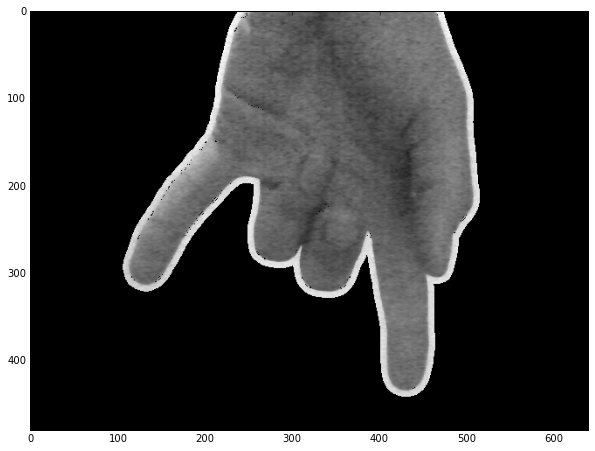

In [120]:
"+++++++++++++++++++++++++++++++++++++++++++"
"frame diff"
import cv2
import skimage
import skimage.io
import matplotlib.pyplot as plt


def start_backing(back,lis):
    base=None
    for img in lis:
        image=cv2.imread(img)
#         print(image.dtype)
        image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        fmask=back.apply(image)
        if base is None: base=np.zeros(image.shape,dtype=int)
        base+=image

lis=['back_{}.png'.format(i) for i in '61 94 107 142 145'.split()]

base=None
back=cv2.createBackgroundSubtractorMOG2()

for img in lis:
    image=cv2.imread(img)
    print(image.dtype)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fmask=back.apply(image)
    if base is None: base=np.zeros(image.shape,dtype=int)
    base+=image
    
base=(base//len(lis)).astype(np.uint8)
base=cv2.medianBlur(base,5)

lis2s='90 118 32 164 233 187 25 88 201 27 189'.split()
lis2=['back_{}.png'.format(i) for i in lis2s]

with open('test_back.txt','r') as f:
    lis2_1=[i[i.rindex('/')+1:].strip() for i in f.readlines()]

lis2.extend(lis2_1)

for img in lis2[:1]:
    image=cv2.imread(img)
    image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    back=cv2.createBackgroundSubtractorMOG2()
    start_backing(back,lis)
    
    
    result2=back.apply(image)
    print(set(result2.flatten()))
    result2[result2==0]=255
    image_min=image.copy()
    image_c=image.copy()
    print('image c dtype: ',image_c.dtype)
    image_c=skimage.filters.gaussian(image_c, \
            sigma=0.825, output=None, mode='nearest')

    print('image c dtype: ',image_c.dtype)
#     image_c=cv2.GaussianBlur(image_c,(15,15),0)
    edges =skimage.img_as_ubyte(canny(image_c))
    edges=cv2.GaussianBlur(edges,(15,15),0)
#     edges=edges!=0.0

#     image_min[result2==255]=0
    
    
    mask = np.zeros((image_min.shape[0]+2,
                    image_min.shape[1]+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(edges, mask, (0,0), 50);
    
    image_min[edges==50]=0
    
    result=np.zeros_like(image)
#     cv2.absdiff(base,image,result)
#     plt.figure(figsize=(10,10))
#     plt.imshow(image,cmap=plt.cm.gray)
    plt.figure(figsize=(10,10))
    plt.imshow(image_min,cmap=plt.cm.gray)
    print(set(result2.flatten()))


In [67]:
a=[[0,1,1,0],[1,1,1,1],[1,0,0,0],[1,0,0,0],[1,1,1,1]]
a=skimage.img_as_ubyte(np.asarray(a,bool))
mask = np.zeros((a.shape[0]+2,
               a.shape[1]+2), np.uint8)
a,b,c,v=cv2.floodFill(a,mask,(3,4),51)
b.shape,b


((5, 4), array([[ 0, 51, 51,  0],
        [51, 51, 51, 51],
        [51,  0,  0,  0],
        [51,  0,  0,  0],
        [51, 51, 51, 51]], dtype=uint8))